## 

## Plan: 
1.) apply naive ML techniques to the csv data, try to gain insights.

In [114]:
import os
import sklearn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression as sk_OLS
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import torch
import torch.nn.functional as F
import math

from sklearn.metrics import r2_score
import string
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression

In [115]:
def rename(x):
    if x == "Nondemented":
        return 0.0
    elif x == "Demented" or x == "Converted":
        return 1.0
    else:
        return x

In [116]:
longitudinal = pd.read_csv("datacsv/oasis_longitudinal.csv")
cross_sectional = pd.read_csv("datacsv/oasis_cross-sectional.csv")

frames = [cross_sectional, longitudinal]
combined = pd.concat(frames)
# combined = combined.rename(columns={"Group": "CDR"})
combined = combined.map(rename)
# combined["Group"] = combined["Group"].astype('float')
# print(combined)
combined.reset_index(inplace=True, drop=True)


print(combined)
combined.to_csv("combined.csv")

                ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
0    OAS1_0001_MR1   F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306   
1    OAS1_0002_MR1   F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531   
2    OAS1_0003_MR1   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207   
3    OAS1_0004_MR1   M    R   28   NaN  NaN   NaN  NaN  1588  0.803  1.105   
4    OAS1_0005_MR1   M    R   18   NaN  NaN   NaN  NaN  1737  0.848  1.010   
..             ...  ..  ...  ...   ...  ...   ...  ...   ...    ...    ...   
804            NaN   M    R   82   NaN  1.0  28.0  0.5  1693  0.694  1.037   
805            NaN   M    R   86   NaN  1.0  26.0  0.5  1688  0.675  1.040   
806            NaN   F    R   61   NaN  2.0  30.0  0.0  1319  0.801  1.331   
807            NaN   F    R   63   NaN  2.0  30.0  0.0  1327  0.796  1.323   
808            NaN   F    R   65   NaN  2.0  30.0  0.0  1333  0.801  1.317   

     Delay Subject ID         MRI ID  Group  Visit  MR Delay  E

In [117]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

cdr_na = combined["CDR"].isna()
# print(combined[cdr_na])


unlabled = combined[cdr_na]
labled = combined[~cdr_na]


print(len(labled)/len(combined))

y_label = labled.CDR
X_label = labled.drop(["CDR", "M/F", "Hand", "Subject ID", "MRI ID", "ID", "Group", "Visit", "Educ", "EDUC", "Delay", "ASF"], axis=1)
X_cluster_label = X_label.drop(["MR Delay", "SES", "MMSE"], axis=1)


x_unlabeled = unlabled.drop(["CDR", "M/F", "Hand", "Subject ID", "MRI ID", "ID", "Group", "Visit", "Educ", "EDUC", "Delay", "MR Delay", "SES", "MMSE", "ASF"], axis=1)



0.7515451174289246


In [118]:

# y = combined.CDR
# combined["NewEd"] = combined.Educ + combined.EDUC
# X = combined.drop(["CDR", "M/F", "Hand", "Subject ID", "MRI ID", "ID", "Group", "Visit", "Educ", "EDUC", "Delay"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_cluster_label, y_label)
print(len(X_train))
# print(y_train)
print(len(X_test))
print(X_train)
# print(X_test)
y_train = y_train.astype('int')
y_test = y_test.astype('int')

456
152
     Age  eTIV   nWBV
120   68  1444  0.789
271   68  1556  0.723
124   80  1494  0.665
252   78  1440  0.670
345   59  1795  0.809
..   ...   ...    ...
133   66  1446  0.784
705   80  1436  0.663
456   80  1323  0.738
197   71  1503  0.792
548   82  1484  0.760

[456 rows x 3 columns]


In [119]:
perc = y_train == 0
# about 15%
print(perc.value_counts())

CDR
True     402
False     54
Name: count, dtype: int64


In [120]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB(alpha=1e-3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))


# print(clf.feature_count_)

y_unlabeled = clf.predict(x_unlabeled)
print(y_unlabeled)

Accuracy:  0.868421052631579
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [121]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

clf_sgd = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-5, random_state=42)
clf_sgd.fit(X_train, y_train)
y_pred = clf_sgd.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))

# why are there three of these 
# print(f"Coef\n{clf_sgd.coef_}")

coefficients = clf_sgd.coef_
# Find the top weighted coefficients
top_coefficients = sorted(enumerate(coefficients[0]), key=lambda x: abs(x[1]), reverse=True)[:8]
coef_names = ["Age", "SES", "MMSE", "eTIV", "nWBV", "ASF", "MR Delay", "NewEd"]

print(top_coefficients)
ranked = []
for i in top_coefficients:
    print(coef_names[i[0]])
    ranked.append(coef_names[i[0]])

Accuracy:  0.868421052631579
[(0, -8687.603175031385), (1, 1194.7894703639038), (2, 311.99428112470633)]
Age
SES
MMSE


In [122]:
# take X-unlabled:
# print(x_unlabeled)
y_unlabeled = clf_sgd.predict(x_unlabeled)
print(y_unlabeled)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [123]:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf_svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))

y_unlabeled = clf_svm.predict(x_unlabeled)
print(y_unlabeled)


Accuracy:  0.868421052631579
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


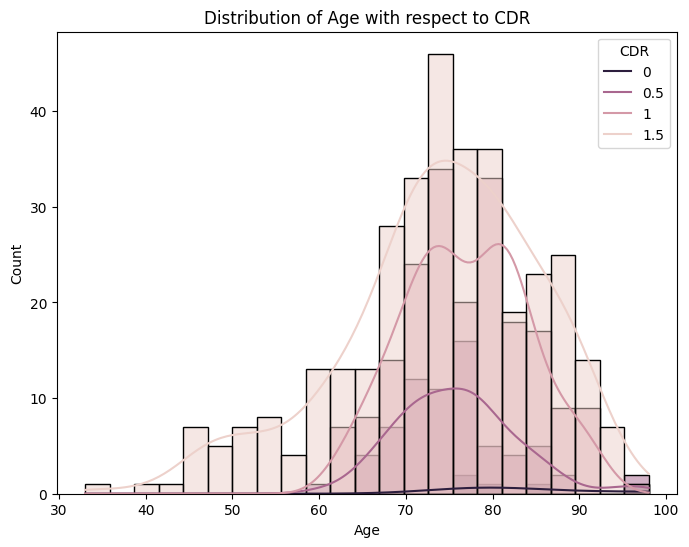

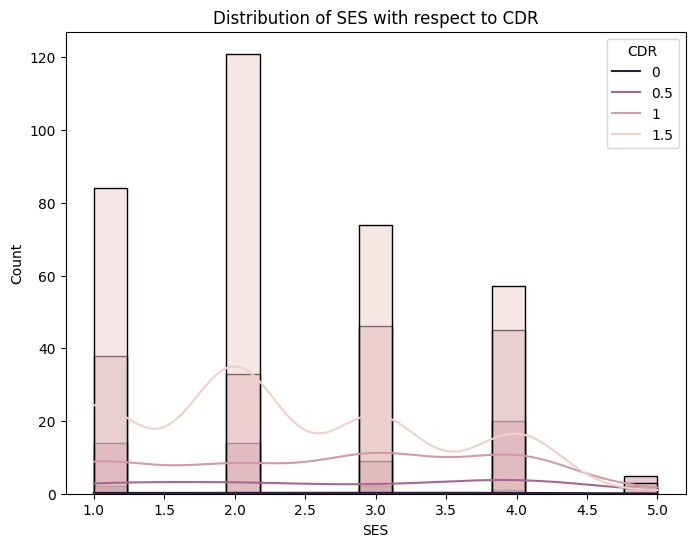

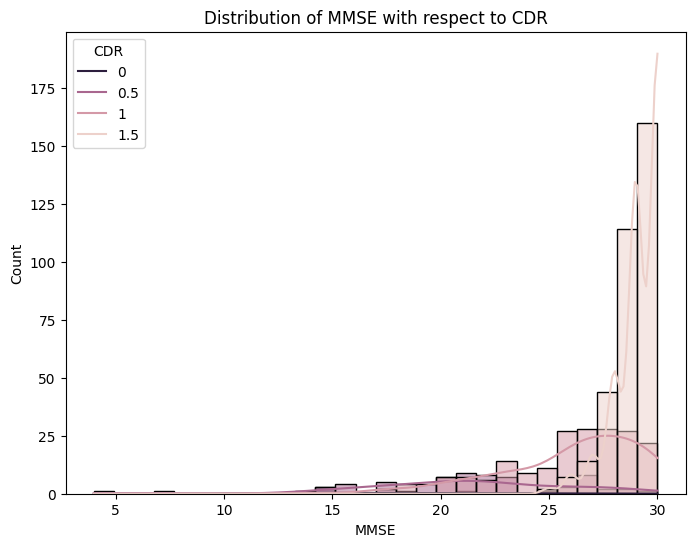

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ranked
class_label = 'CDR'

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=combined, x=feature, hue=class_label, kde=True)
    plt.title(f"Distribution of {feature} with respect to {class_label}")
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend([0,.5,1,1.5], title=class_label)
    plt.show()


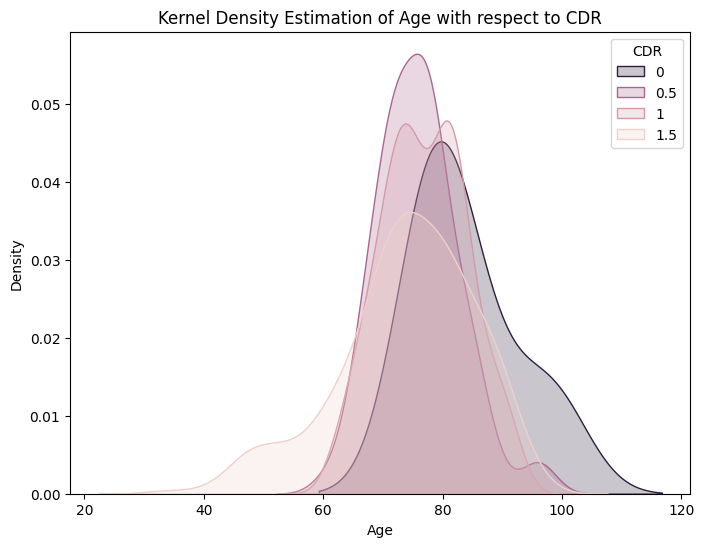

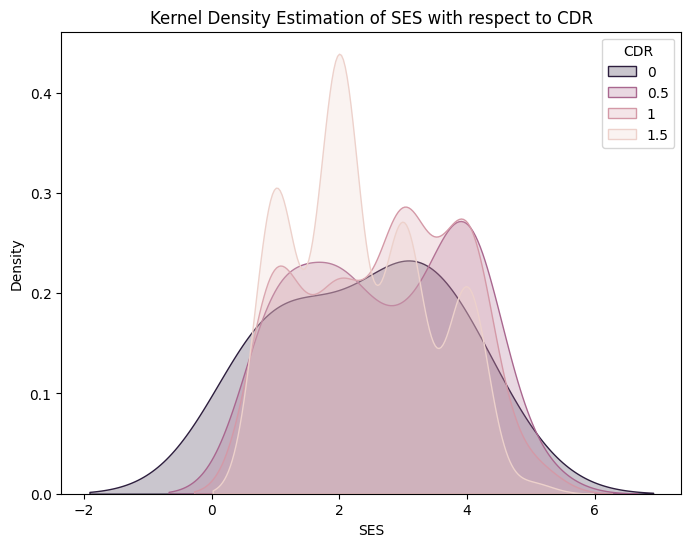

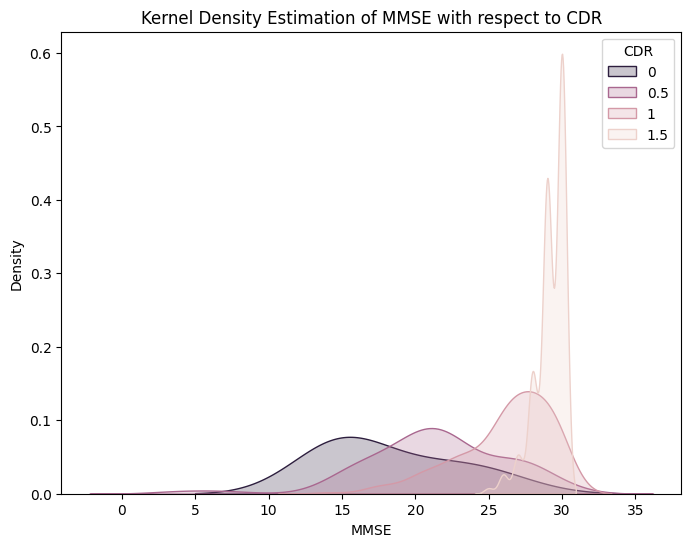

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ranked
class_label = 'CDR'

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=combined, x=feature, hue=class_label, fill=True, common_norm=False)
    plt.title(f"Kernel Density Estimation of {feature} with respect to {class_label}")
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend([0,.5,1,1.5], title=class_label)
    plt.show()

